# EDA for Feature Selection

### invoking the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#rading the daa 
data = pd.read_csv("dynamic_pricing.csv")

In [3]:
#dimension of data
data.shape

(1000, 10)

In [4]:
#Top 5 records
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [5]:
# check for missing values
missing_values = data.isnull().sum()

In [6]:
missing_values

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [7]:
# check for data types
data_types = data.dtypes

In [8]:
data_types

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [9]:
#meta information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


### Univariate Analysis

__Univariate analysis examines individual numerical features to understand their distribution, central tendency, and outliers. With data quality confirmed, this initial exploration sets the stage for deeper analysis, revealing patterns and anomalies crucial for informed decision-making.__

In [10]:
# define the numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
                  'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

In [12]:
# descriptive statistics for numerical features
descriptive_stats = data[numerical_cols].describe()
descriptive_stats

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


## numerical variables

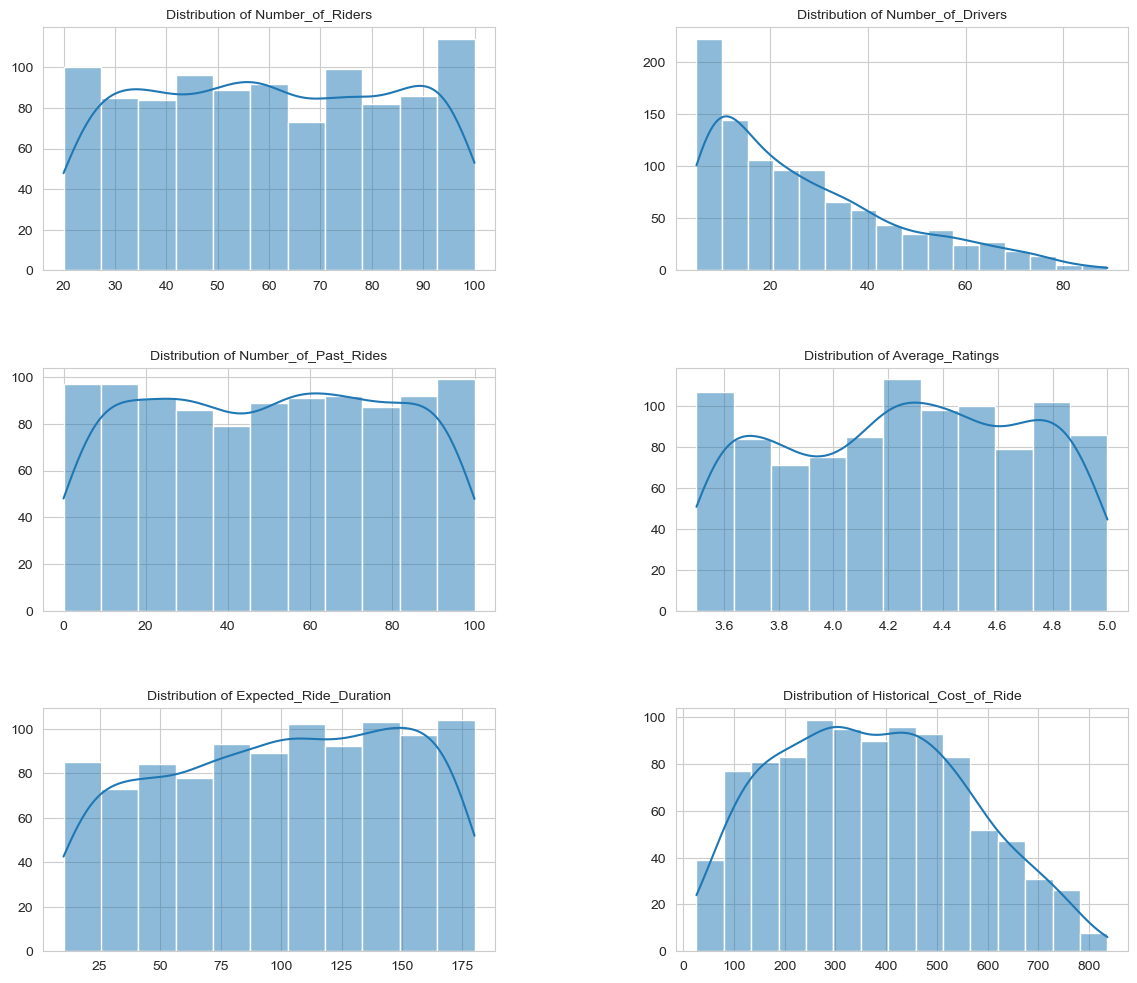

In [13]:
# plotting distributions for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

- `Number_of_Riders:` Uniform distribution suggests fluctuating demand.
- `Number_of_Drivers:` Skewed towards lower values, indicating possible scarcity.
- `Number_of_Past_Rides:` Even distribution implies varied customer experiences.
- `Average_Ratings:` Normally distributed around 4.26, signifying positive feedback.
- `Expected_Ride_Duration:` Wide range (10 to 180 minutes) reflects diverse trip lengths.
- `Historical_Cost_of_Ride:` Right-skewed distribution; most rides cost less than the mean (372.50 units), but outliers are substantially more expensive.

## categorical variables

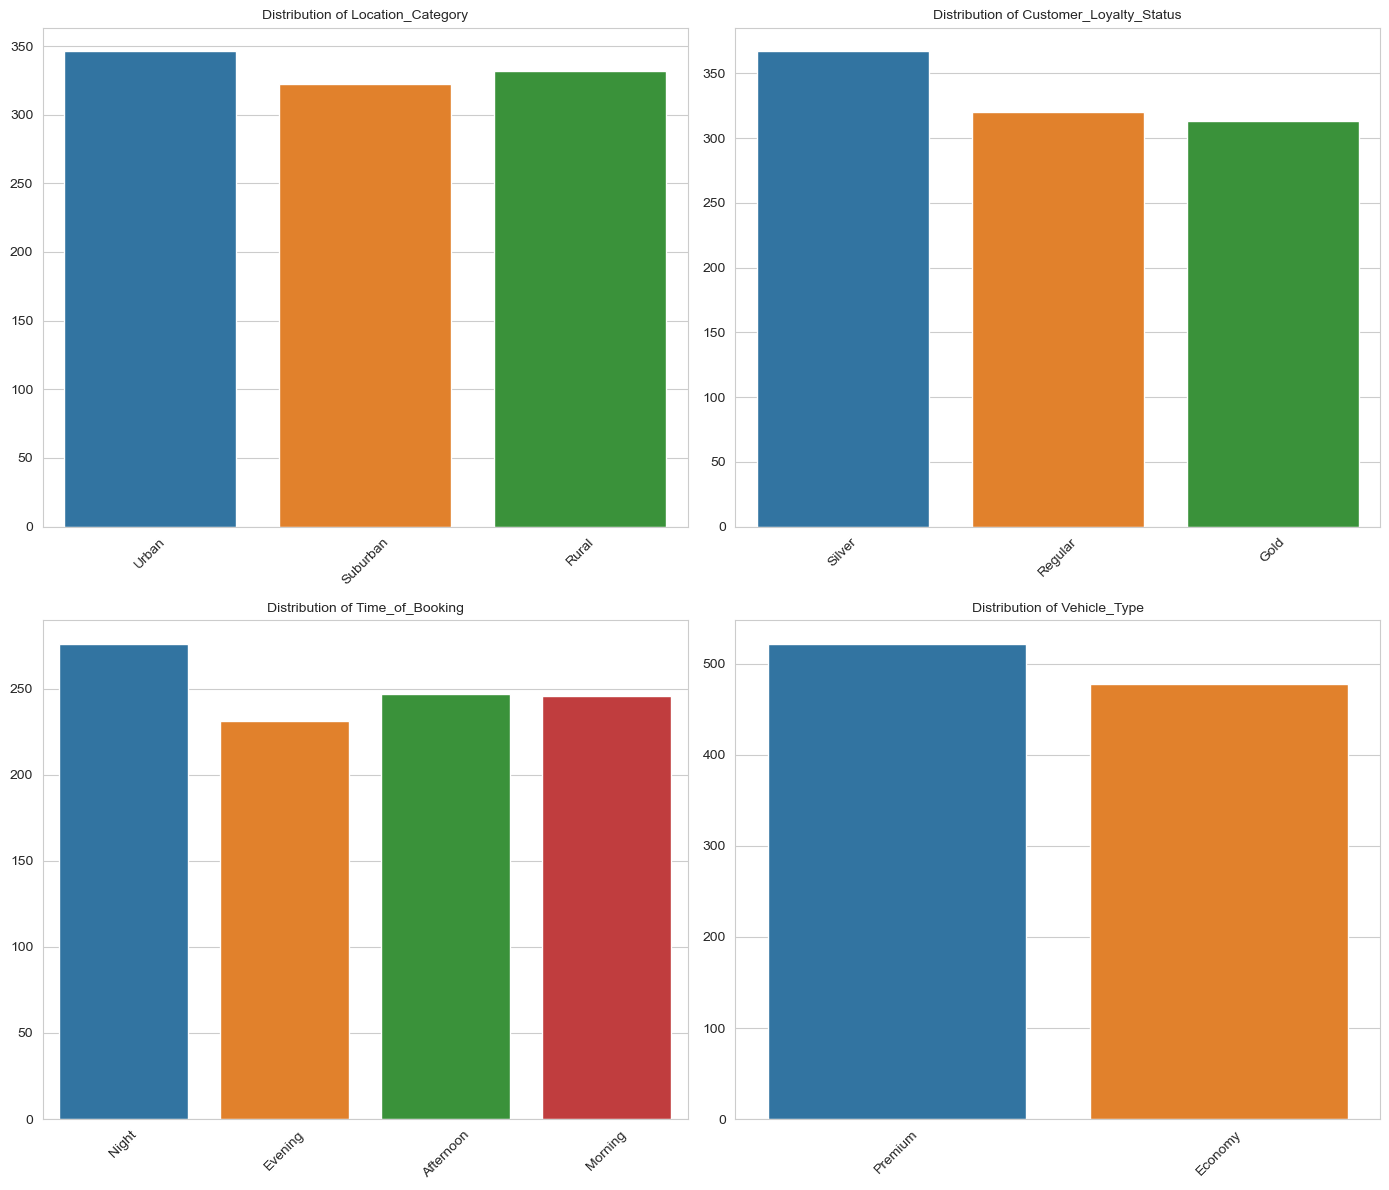

In [14]:
# plotting distributions for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()

- `Location_Category:` Variation in distribution across "Urban," "Suburban," and "Rural" categories implies potential impact on ride costs due to differences in demand and availability.
- `Customer_Loyalty_Status:` Varying levels of loyalty statuses, including "Silver," "Regular," and "Gold," suggest a mix of new and loyal customers influencing ride costs through loyalty programs or premium pricing.
- `Time_of_Booking:` Categories like "Night," "Evening," "Afternoon," and "Morning" reflect fluctuating demand throughout the day, potentially affecting ride costs.
- `Vehicle_Type:` Distribution across "Premium" and "Economy" options indicates direct impact on ride costs, with premium vehicles typically priced higher than economy options.

## Bivariate Analysis

__Now, onto bivariate analysis. This step explores the relationships between Historical_Cost_of_Ride and other features. By uncovering which features impact ride costs the most, we can refine our predictive modeling process for better accuracy.__

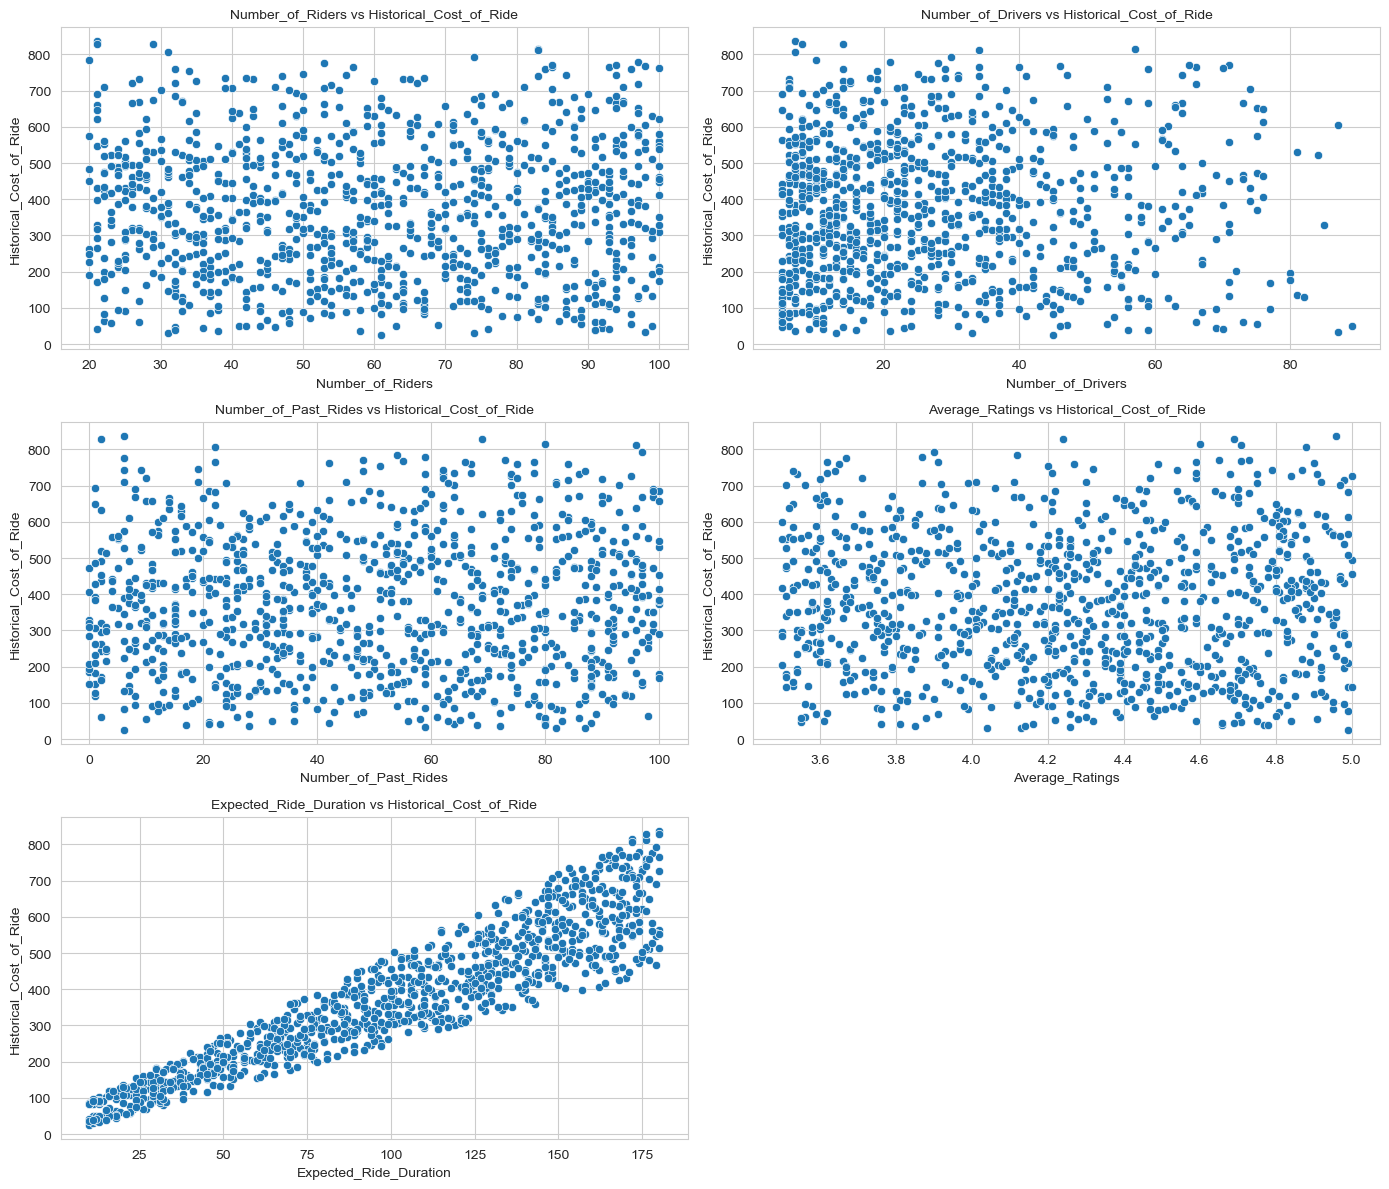

In [15]:
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten()

# plot each numerical column against the historical cost.
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- `Number_of_Riders:` Scattered distribution suggests no clear linear relationship with ride cost.
- `Number_of_Drivers:` Similar lack of linear relationship indicates complexity in pricing dynamics.
- `Number_of_Past_Rides:` Absence of linear relationship suggests loyalty doesn't directly impact ride cost.
- `Average_Ratings:` No strong linear relationship between ratings and ride cost observed.
- `Expected_Ride_Duration:` Potential trend shows longer durations associated with higher costs, implying intuitive pricing dynamics.

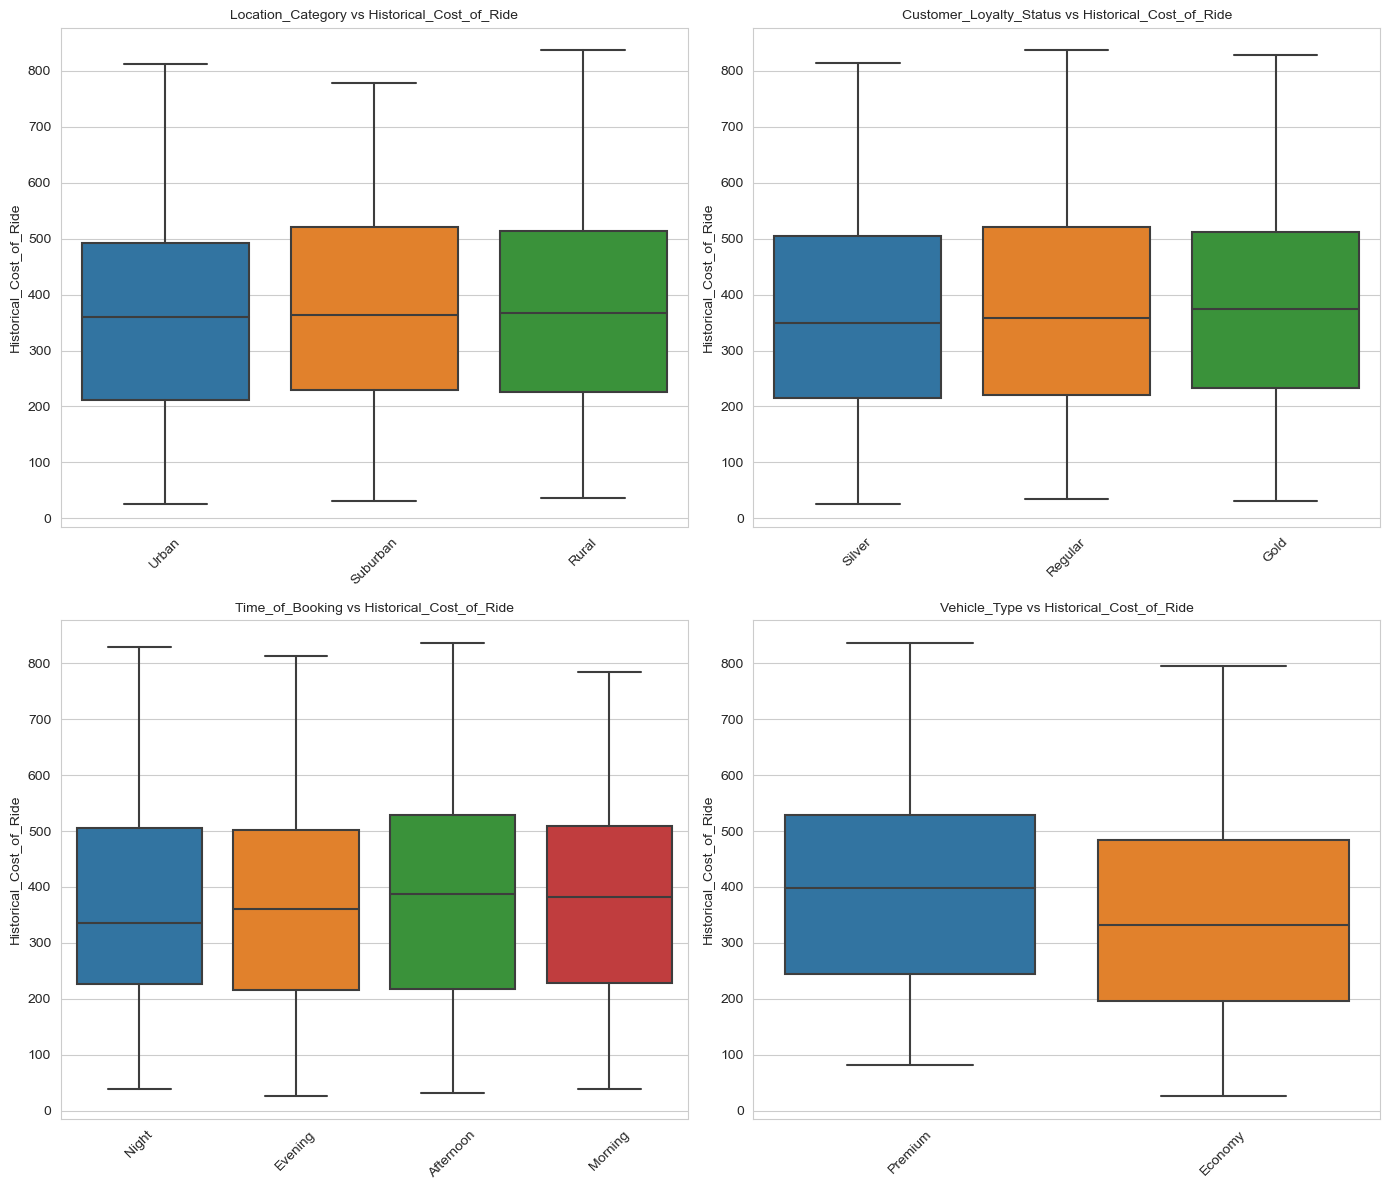

In [16]:
# bivariate Analysis: categorical features vs historical_cost_of_ride
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Historical_Cost_of_Ride')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()

- `Location_Category:` Ride costs vary significantly across urban, suburban, and rural areas, suggesting location's pivotal role in pricing due to demand and operational differences.
- `Customer_Loyalty_Status:` Differences in ride costs based on loyalty status imply loyalty programs' influence on pricing, with potential discounts or perks for higher-status customers.
- `Time_of_Booking:` Cost variations based on booking time indicate fluctuating demand throughout the day, with peak times potentially commanding higher prices.
- `Vehicle_Type:` Significant cost differences between premium and economy vehicles underscore vehicle type's critical role in pricing decisions.

# Insights Gathered from EDA for Feature Selection
### Based on the EDA, the following features are identified as potentially important for predicting ride costs:

Expected_Ride_Duration: Shows a clear relationship with ride cost.\
Location_Category: Significant variance in costs by location.\
Customer_Loyalty_Status: Variability in costs suggests an impact on pricing.\
Time_of_Booking: Variations in costs indicate an influence of demand at different times.\
Vehicle_Type: Directly influences cost with clear distinctions between vehicle types.

# Summary
__So, this is how you can perform EDA for Feature Selection using Python. EDA is a valuable step in a data science workflow, particularly for feature selection. It helps you know about the best candidates for features based on their relationship with the target variable and each other, their relevance, and their predictive power.__